In [ ]:
import numpy as np
import tqdm
import os

train_x = []
train_y = []
eval_x = []
eval_y = []

csv_path = os.getenv('HOME')+'/aiffel/tfjs_mobile/data/fer2013.csv'

with open(csv_path) as f:
  for line in tqdm.tqdm(f.read().splitlines()[1:]):
    emotion, pixels, usage = line.split(',')
    
    x = np.array(pixels.split(' ')).astype(float).reshape(48, 48, 1) / 255
    y = int(emotion)

    if usage == 'PrivateTest':
      eval_x.append(x)
      eval_y.append(y)
    else:
      train_x.append(x)
      train_y.append(y)

print('train : {}, eval :{}'.format(len(train_x), len(eval_x)))

100%|██████████| 35887/35887 [00:26<00:00, 1333.76it/s]

train : 32298, eval :3589


Angry


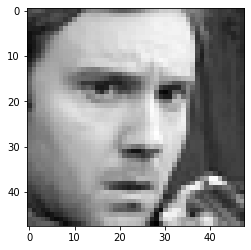

In [ ]:
from matplotlib import pyplot as plt

LABELS = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

print(LABELS[train_y[0]])
plt.imshow(train_x[0].reshape([48, 48]), cmap='gray')

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, ZeroPadding2D
# model 선언 
model = None
# input_tensor = Input(shape=(48,48,1))
model = tf.keras.applications.MobileNet(input_shape=(48,48,1), dropout = 0.25, weights=None, classes=7)
# output_tensor = ZeroPadding2D()(output_tensor)
# output_tensor = Conv2D(kernel_size=(3,3),fitilters=5)(output_tensor)
# model = Model(inputs = input_tensor, outputs = output_tensor)

# model.compile
model.compile(optimizer=tf.keras.optimizers.Adam(lr = 1e-4, decay = 1e-6),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

#model.fit
model.fit(np.stack(train_x),
          tf.keras.utils.to_categorical(train_y),
          epochs=100,
          batch_size=512,
          validation_data=(np.stack(eval_x),
                           tf.keras.utils.to_categorical(eval_y)))

Epoch 1/100
64/64 [==============================] - 97s 2s/step - loss: 2.1507 - categorical_accuracy: 0.1788 - val_loss: 1.9209 - val_categorical_accuracy: 0.1655
Epoch 2/100
64/64 [==============================] - 97s 2s/step - loss: 1.9221 - categorical_accuracy: 0.2357 - val_loss: 1.8961 - val_categorical_accuracy: 0.1655
Epoch 3/100
64/64 [==============================] - 96s 2s/step - loss: 1.8585 - categorical_accuracy: 0.2554 - val_loss: 1.8748 - val_categorical_accuracy: 0.1655
Epoch 4/100
64/64 [==============================] - 92s 1s/step - loss: 1.8135 - categorical_accuracy: 0.2710 - val_loss: 1.8584 - val_categorical_accuracy: 0.1655
Epoch 5/100
64/64 [==============================] - 92s 1s/step - loss: 1.7568 - categorical_accuracy: 0.2947 - val_loss: 1.8493 - val_categorical_accuracy: 0.1655
Epoch 6/100
64/64 [==============================] - 91s 1s/step - loss: 1.7001 - categorical_accuracy: 0.3208 - val_loss: 1.8428 - val_categorical_accuracy: 0.1655
Epoch 7/10

64/64 [==============================] - 99s 2s/step - loss: 0.2457 - categorical_accuracy: 0.9144 - val_loss: 3.8405 - val_categorical_accuracy: 0.2881
Epoch 51/100
64/64 [==============================] - 103s 2s/step - loss: 0.2723 - categorical_accuracy: 0.9051 - val_loss: 3.7712 - val_categorical_accuracy: 0.3048
Epoch 52/100
64/64 [==============================] - 104s 2s/step - loss: 0.3094 - categorical_accuracy: 0.8945 - val_loss: 3.8137 - val_categorical_accuracy: 0.2965
Epoch 53/100
64/64 [==============================] - 103s 2s/step - loss: 0.2149 - categorical_accuracy: 0.9272 - val_loss: 3.7778 - val_categorical_accuracy: 0.2979
Epoch 54/100
64/64 [==============================] - 104s 2s/step - loss: 0.1534 - categorical_accuracy: 0.9504 - val_loss: 3.8083 - val_categorical_accuracy: 0.2887
Epoch 55/100
64/64 [==============================] - 103s 2s/step - loss: 0.2223 - categorical_accuracy: 0.9236 - val_loss: 3.8748 - val_categorical_accuracy: 0.2962
Epoch 56/100

64/64 [==============================] - 98s 2s/step - loss: 0.1202 - categorical_accuracy: 0.9585 - val_loss: 4.2500 - val_categorical_accuracy: 0.3082
Epoch 100/100
64/64 [==============================] - 97s 2s/step - loss: 0.0994 - categorical_accuracy: 0.9675 - val_loss: 4.2862 - val_categorical_accuracy: 0.3029


In [ ]:
import os
model_json = emotion_model.to_json()
with open("model/emotion_model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
from tensorflow.keras.models import load_model
emotion_model = load_model('model/emotion_model.hdf5')

# Conlusion

- 속도가 느려서 이 부분이 개선이 필요할 것 같다.
- 모델 부분도 성능이 떨어지는 편이라 개선이 필요
-> [당장 바꿀 수 없는 부분이라 다른 모델을 가져와서 사용함.](https://mechasolution.vn/source/blog/AI-tutorial/Emotion_Recognition/)
-> [여기서 확인](https://yooonjiwon.github.io/Aiffel/exploration/e12_face2emoji/)